## Section 3.11 -Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
#creating the the truth table:
def truthtable (n):
    if n<1:
        return [[]]
    subtable=truthtable(n-1)
    return [ row + [v] for row in subtable for v in [0,1] ]

Z= truthtable(4)
#Z
df = pd.DataFrame(data=Z)
#df
### Changing the column names:
df.columns= (['A','B','C','D'])
df
### Parity Function:
def Parity_Fn(df):
    if (df['A']+df['B']+df['C']+df['D'])%2 ==0 :
        Value= True
    else:
              Value= False
    return Value

#print(df.apply(Parity_Fn, axis=1))
# Assigning the newly created column to a dataset
df=df.assign(Class=df.apply(Parity_Fn, axis=1))
df

,A,B,C,D,Class
0,0,0,0,0,True
1,0,0,0,1,False
2,0,0,1,0,False
3,0,0,1,1,True
4,0,1,0,0,False
5,0,1,0,1,True
6,0,1,1,0,True
7,0,1,1,1,False
8,1,0,0,0,False
9,1,0,0,1,True


In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
#import graphviz
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
### Let's create the data with only features
df_data=df.loc[:,['A','B','C','D']]
print("data""\n"+str(df_data))
### Let's look at the Feature Names
df_feature_names=['A','B','C','D']
print("Feature""\n"+str(df_feature_names))
### Let's create the data with only class
df_target=df.loc[:,['Class']]
df_target

data
    A  B  C  D
0   0  0  0  0
1   0  0  0  1
2   0  0  1  0
3   0  0  1  1
4   0  1  0  0
5   0  1  0  1
6   0  1  1  0
7   0  1  1  1
8   1  0  0  0
9   1  0  0  1
10  1  0  1  0
11  1  0  1  1
12  1  1  0  0
13  1  1  0  1
14  1  1  1  0
15  1  1  1  1
Feature
['A', 'B', 'C', 'D']


,Class
0,True
1,False
2,False
3,True
4,False
5,True
6,True
7,False
8,False
9,True


In [5]:
#### Let's create the classifier:
clf = tree.DecisionTreeClassifier(random_state=0)

In [6]:
## Fit the model:
clf=clf.fit(df_data,df_target)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

[Text(167.4, 195.696, 'X[1] <= 0.5\nentropy = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(83.7, 152.208, 'X[0] <= 0.5\nentropy = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(41.85, 108.72, 'X[2] <= 0.5\nentropy = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(20.925, 65.232, 'X[3] <= 0.5\nentropy = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(10.4625, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(31.387500000000003, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(62.775000000000006, 65.232, 'X[3] <= 0.5\nentropy = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(52.3125, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(73.2375, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 108.72, 'X[3] <= 0.5\nentropy = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(104.625, 65.232, 'X[2] <= 0.5\nentropy = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(94.16250000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(115.0875, 21.744, 'entrop

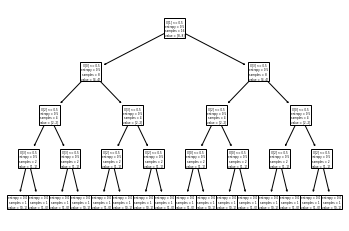

In [7]:
### Let's plot the Tree: Method 1
tree.plot_tree(clf)

In [8]:
print("The feature importances are " + str(clf.feature_importances_))
print("The score is %f " % clf.score(df_data,df_target))

The feature importances are [0.25 0.   0.5  0.25]
The score is 1.000000 
